**<h1 style="text-align: center;">🕵🏻 EDA on Vehicle Sales Data 🏎️</h1>**

## 👋🏼 ***Introduction***

<p style="text-align: justify;">My client company is JJ motors.
They are one of the leading car resellers in US. They have provided me a dataset of vehicle sales data. They want to find some business insigts from this dataset so that they can improve they sales in the market.</p>


## 🧿 ***Objective***
 <p style="text-align: justify;">I will be conducting  Exploratory Data Analysis (EDA) on Vehicle Sales Data dataset and try to get an insights of the dataset. I have some business questions in mind which will help the company in improving their sales. Let's see how we can find the answers to these questions. .I will be loading the dataset and then try to find and any relationships, treands and patterns between among the various features of the dataset. Also, I will be trying to find answers to the below set of questions.</p>

**About the data**  
This [**dataset**](https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data/code) contains 16 columns of sales data

## ***Table of Content***

##### ⬇ [**Importing Libraries**](#library)
##### 📊 [**Importing Dataset**](#dataset)
##### 💭 [**My taughts on the dataset**](#thoughts)
##### 🧹 [**Data Cleaning**](#cleaning)
##### ❓ [**Business Questions**](#questions)
##### 💡 **Conclusion**  






## ***Let's go....***

<a id='library'></a>
## ⬇ <span style="color: #20479b; font-weight: bold;">Importing Libraries</span>

I start by importing the necessary libraries for my Exploratory Data Analysis tasks in Python.

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
from dateutil import parser
import datetime as dt
import plotly.graph_objs as go

<a id='dataset'></a>  

## 📊 <span style="color: #20479b; font-weight: bold;">Importing Dataset</span>

In [213]:
df = pd.read_csv('/Users/jasonjoelpinto/Documents/GitHub/python-datascience-projects/009. eda_on_ecommerce_dataset/dataset/car_prices.csv')

print("No. of rows.   :", df.shape[0])
print("No. of cols.   :", df.shape[1])  
print("="*30)


df.head(5)

No. of rows.   : 558837
No. of cols.   : 16


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


<a id='exploration'></a>
## 🗺️ <span style="color: #20479b; font-weight: bold;">Exploring the dataset</span>

After loading the dataset into the DataFrame `df`, I will check the `df` shape using the `.shape` attribute.

In [214]:
df.shape

(558837, 16)

As you can see above there are 5558837 rows and 16 columns

I will use `.info` method to get a shortsummary of the DataFrame. It will include the number of non-null values, Data Types, and Memory Usage etc.

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


I can see that the 
- count in the **Non-Null** column is less than the total columns i.e. 558837
- that means that there are many NULL values in the dataset. 
- which we will take care in the data cleaning part.

I will use `dtypes` attribute to get the datatypes of the columns.  
I will also get the same details in `.info()` attribute above. But I like to view it seperately we get a getter understanding.

In [216]:
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object

I will use `df.describe()` 
- to generate a descriptive statistics of numerical columns of the DataFrame. 
- It will provide us various functions such as mean, count, Standard Deviation, Min, Max and percentiles.
- I have used **Transpose** here as I want the columns of my DataFrame as the index.
- This especially helps when I have many numrical columns.

In [217]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,558837.0,2010.038927,3.966864,1982.0,2007.0,2012.0,2013.0,2015.0
condition,547017.0,30.672365,13.402832,1.0,23.0,35.0,42.0,49.0
odometer,558743.0,68320.017767,53398.542821,1.0,28371.0,52254.0,99109.0,999999.0
mmr,558799.0,13769.377495,9679.967174,25.0,7100.0,12250.0,18300.0,182000.0
sellingprice,558825.0,13611.358810,9749.501628,1.0,6900.0,12100.0,18200.0,230000.0


### <span style="color: #c81717; font-weight: bold;">HAS TO BE RE-WRITTEN</span>
1. **Year**:
   - The dataset spans from the year 1982 to 2015, with the majority of vehicles being sold between 2007 and 2013.
   - The average year of sale is approximately 2010, indicating that the dataset predominantly consists of relatively recent vehicle sales.

2. **Condition**:
   - The condition values range from 1 to 49, with higher values representing better conditions.
   - The average condition value is around 30, suggesting that the vehicles in the dataset generally have moderate to good conditions.

3. **Odometer**:
   - Odometer readings range from 1 to 999,999 miles.
   - The average odometer reading is approximately 68,320 miles, indicating that the vehicles vary widely in terms of mileage.
   - The median (50th percentile) odometer reading is 52,254 miles, suggesting that half of the vehicles have odometer readings below this value.

4. **MMR (Market Median Retail)**:
   - MMR values represent the median retail price of vehicles in the market.
   - The MMR values range from 25 to 182,000, with an average MMR of approximately 13,769.
   - The median MMR is 12,250, indicating that half of the vehicles in the dataset have market median retail prices below this value.

5. **Selling Price**:
   - Selling prices of vehicles in the dataset range from 1 to 230,000.
   - The average selling price is approximately 13,611, suggesting that the dataset contains a mix of vehicles across different price ranges.
   - The median selling price is 12,100, indicating that half of the vehicles were sold at prices below this value.

Overall, this summary provides valuable insights into the distribution and characteristics of the vehicle sales dataset, including information about the years of sale, vehicle conditions, mileage, market median retail prices, and selling prices.

In [218]:
print("Number of rows.   :", df.shape[0])
print("="*30)

df.isnull().sum()

Number of rows.   : 558837


year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

Now I am going to check how much percentage of the columns are null. If they are negligible percentage then we can just drop the columns. Otherwise I will fill the na values with the meaninfull values.

In [219]:
null_percentage = {}
for column in df:
    null_percentage[column] = round(( ( df[column].isnull().sum() ) / len(df)) * 100,2)
np_df = pd.DataFrame( list( null_percentage.items() ),  columns=[  'column_name'  , 'null_percentage' ])
np_df

,column_name,null_percentage
0,year,0.00
1,make,1.84
2,model,1.86
3,trim,1.91
4,body,2.36
5,transmission,11.69
6,vin,0.00
7,state,0.00
8,condition,2.12
9,odometer,0.02


As the null percentage is negligible when compared to the size of the dataset, we can drop these null columns. The max null percentage is for the column **transmission** i.e. **11.69**.

In [220]:
df["state"].unique()

array(['ca', 'tx', 'pa', 'mn', 'az', 'wi', 'tn', 'md', 'fl', 'ne', 'nj',
       'nv', 'oh', 'mi', 'ga', 'va', 'sc', 'nc', 'in', 'il', 'co', 'ut',
       'mo', 'ny', 'ma', 'pr', 'or', 'la', 'wa', 'hi', 'qc', 'ab', 'on',
       'ok', 'ms', 'nm', 'al', '3vwd17aj4fm201708', 'ns',
       '3vwd17aj2fm258506', '3vwd17aj3fm276741', '3vwd17aj2fm285365',
       '3vwd17aj0fm227318', '3vwd17aj6fm218641', '3vwd17aj7fm223475',
       '3vwd17aj5fm297123', '3vwd17aj5fm219943', '3vwd17aj9fm219766',
       '3vwd17aj3fm259017', '3vwd17aj5fm206111', '3vwd17aj5fm273601',
       '3vwd17aj5fm221322', '3vwd17aj5fm268964', '3vwd17aj6fm231972',
       '3vwd17aj7fm222388', '3vwd17aj7fm218440', '3vwd17ajxfm315938',
       '3vwd17aj7fm229552', '3vwd17aj8fm298895', '3vwd17aj4fm236636',
       '3vwd17aj5fm225953', '3vwd17aj7fm326640', '3vwd17aj8fm239622',
       '3vwd17aj2fm261566'], dtype=object)

I can see a lot of unwanted error data here. We have to delete these error data.

In [221]:
df["transmission"].unique()

array(['automatic', nan, 'manual', 'Sedan', 'sedan'], dtype=object)

In transmission column I can see that, **nan**, **sedan** and **Sedan** are not data errors, hence we will delete them as well.

In [222]:
df['make'].unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'lincoln', 'Jaguar', 'Volkswagen',
       'Toyota', 'Subaru', 'Scion', 'Porsche', nan, 'bmw', 'Dodge',
       'FIAT', 'Chrysler', 'ford', 'Ferrari', 'Honda', 'GMC',
       'mitsubishi', 'Ram', 'smart', 'chevrolet', 'Bentley', 'chrysler',
       'pontiac', 'Pontiac', 'Saturn', 'Maserati', 'Mercury', 'HUMMER',
       'landrover', 'cadillac', 'land rover', 'mercedes', 'mazda',
       'toyota', 'lexus', 'gmc truck', 'honda', 'nissan', 'porsche',
       'Saab', 'Suzuki', 'dodge', 'subaru', 'Oldsmobile', 'oldsmobile',
       'hyundai', 'jeep', 'Isuzu', 'dodge tk', 'Geo', 'acura',
       'volkswagen', 'suzuki', 'kia', 'audi', 'Rolls-Royce', 'gmc',
       'maserati', 'mazda tk', 'mercury', 'buick', 'hyundai tk',
       'mercedes-b', 'vw', 'Daewoo', 'chev truck', 'f

I see alot of redundent entries here, because data is case sentitive. Hence we can make all small.

In [223]:
sorted(df['make'].astype(str).unique())

['Acura',
 'Aston Martin',
 'Audi',
 'BMW',
 'Bentley',
 'Buick',
 'Cadillac',
 'Chevrolet',
 'Chrysler',
 'Daewoo',
 'Dodge',
 'FIAT',
 'Ferrari',
 'Fisker',
 'Ford',
 'GMC',
 'Geo',
 'HUMMER',
 'Honda',
 'Hyundai',
 'Infiniti',
 'Isuzu',
 'Jaguar',
 'Jeep',
 'Kia',
 'Lamborghini',
 'Land Rover',
 'Lexus',
 'Lincoln',
 'Lotus',
 'MINI',
 'Maserati',
 'Mazda',
 'Mercedes-Benz',
 'Mercury',
 'Mitsubishi',
 'Nissan',
 'Oldsmobile',
 'Plymouth',
 'Pontiac',
 'Porsche',
 'Ram',
 'Rolls-Royce',
 'Saab',
 'Saturn',
 'Scion',
 'Subaru',
 'Suzuki',
 'Tesla',
 'Toyota',
 'Volkswagen',
 'Volvo',
 'acura',
 'airstream',
 'audi',
 'bmw',
 'buick',
 'cadillac',
 'chev truck',
 'chevrolet',
 'chrysler',
 'dodge',
 'dodge tk',
 'dot',
 'ford',
 'ford tk',
 'ford truck',
 'gmc',
 'gmc truck',
 'honda',
 'hyundai',
 'hyundai tk',
 'jeep',
 'kia',
 'land rover',
 'landrover',
 'lexus',
 'lincoln',
 'maserati',
 'mazda',
 'mazda tk',
 'mercedes',
 'mercedes-b',
 'mercury',
 'mitsubishi',
 'nan',
 'nissan

<a id='thoughts'></a>
## 💭 <span style="color: #20479b; font-weight: bold;">My thoughts on the dataset</span>

As per my initial Data Exploration,
- I can see that the dataset is huge with 558837 columns.
- This dataset consits of alot of null values which can be deleted considering the size of the data.
- VIN number is unique for each vahicle, hence it is not useful for me, hence I will drop the column.
- I also noticed that the datatype of `saledate` column is object, and it also can time and timezone which we may not need.
- `state` and `transmission` column has error data, which I can delete.



I will be following the below steps to 🧹 clean my data for further analysis.
1. ❎ Drop all the rows containing `null` values.
2. ❎ Drop columns `VIN`.
3. 🪛 Convert the saledate column to Datetime format using `dateutil`.
4. 🪛 Add columns `sale_year` and  `sale_month` using the `saledate` column.
4. 🪛 Make column `make` all smalll.
5. 🪛 Replace the make error in make with the standard make name.
5. ❎ Drop the rows with error data from `state` and `transmission` columns.
6. ✅ Re-arrange the columns for better view. 

<a id='cleaning' ></a>
## 🧹 <span style="color: #20479b; font-weight: bold;">Data Cleaning</span>


You can see that the null_percentage for each column is negligible. The max is for Transmission is 11.69%, which is negligible when we consider the datasize, i.e. 558837 of data. Hence I will be droping the rows with null values.

In [224]:
df.dropna(inplace=True)

In [225]:
print("Number of rows.   :", df.shape[0])
print("="*30)

df.isnull().sum()

Number of rows.   : 472325


year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

VIN number is not usefull for my analysis, hence I will be droping it.

In [226]:
df.drop("vin",axis=1,inplace=True)
df.head(5)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


And you can also see that sale date is different format. So I am going to use `dateutil.parser` module to clean it and convert it to datetime format. This module will automatically detect varies formats and convert it for us

In [227]:
df['saledatetime']  =    pd.to_datetime(df['saledate' ].apply( parser.parse),utc=True)
df.head(5)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,saledatetime
0,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2014-12-16 04:30:00+00:00
1,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2014-12-16 04:30:00+00:00
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),2015-01-14 20:30:00+00:00
3,2015,Volvo,S60,T5,Sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),2015-01-28 20:30:00+00:00
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),2014-12-18 04:30:00+00:00


Now we can 
1. drop the older  `saledate` column, 
2. create a new `saledate` column which will have only the saledate and remove the time as it is not important for us.
3. drop the `saledatetime`.
4. add `sale_date` and `sale_year` columns.

In [228]:
df.drop("saledate",axis=1,inplace=True)
df["saledate"] = pd.to_datetime(df["saledatetime"].dt.date)
df.drop("saledatetime",axis=1,inplace=True)
df['sale_month'] = df['saledate'].dt.strftime('%B')
df['sale_year'] = df['saledate'].dt.year
df.head(5)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,sale_month,sale_year
0,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16,December,2014
1,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16,December,2014
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-14,January,2015
3,2015,Volvo,S60,T5,Sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015-01-28,January,2015
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,2014-12-18,December,2014


Next I will change the `make` column to all small.

In [229]:
df['make'] = df['make'].str.lower()

Here I will replace the make names with standard one's

In [230]:
df['make'].replace({'chev truck':'chevrolet','dodge tk':'dodge','ford tk':'ford','ford truck':'ford','gmc truck':'gmc','hyundai tk':'hyundai','land rover':'landrover',
                    'mazda tk':'mazda','mercedes-b':'mercedes','mercedes-benz':'mercedes','vw':'volkswagen'},inplace=True)
sorted(df['make'].astype(str).unique())

['acura',
 'aston martin',
 'audi',
 'bentley',
 'bmw',
 'buick',
 'cadillac',
 'chevrolet',
 'chrysler',
 'daewoo',
 'dodge',
 'ferrari',
 'fiat',
 'fisker',
 'ford',
 'geo',
 'gmc',
 'honda',
 'hummer',
 'hyundai',
 'infiniti',
 'isuzu',
 'jaguar',
 'jeep',
 'kia',
 'lamborghini',
 'landrover',
 'lexus',
 'lincoln',
 'lotus',
 'maserati',
 'mazda',
 'mercedes',
 'mercury',
 'mini',
 'mitsubishi',
 'nissan',
 'oldsmobile',
 'plymouth',
 'pontiac',
 'porsche',
 'ram',
 'rolls-royce',
 'saab',
 'saturn',
 'scion',
 'smart',
 'subaru',
 'suzuki',
 'tesla',
 'toyota',
 'volkswagen',
 'volvo']

In [231]:
df =  df[ ~df[ 'state'].str.startswith('3vwd'  )]
df.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,sale_month,sale_year
0,2015,kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16,December,2014
1,2015,kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16,December,2014
2,2014,bmw,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-14,January,2015
3,2015,volvo,S60,T5,Sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015-01-28,January,2015
4,2014,bmw,6 Series Gran Coupe,650i,Sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,2014-12-18,December,2014


I also want to rearrange the columns in the dataframe for better visiblity

In [232]:
rearranged_columns = ['year','make','model','trim','body','transmission','state','condition','color','interior','saledate','sale_year','sale_month','seller','sellingprice','mmr','odometer']
df = df[rearranged_columns]
df.head(5)

,year,make,model,trim,body,transmission,state,condition,color,interior,saledate,sale_year,sale_month,seller,sellingprice,mmr,odometer
0,2015,kia,Sorento,LX,SUV,automatic,ca,5.0,white,black,2014-12-16,2014,December,kia motors america inc,21500.0,20500.0,16639.0
1,2015,kia,Sorento,LX,SUV,automatic,ca,5.0,white,beige,2014-12-16,2014,December,kia motors america inc,21500.0,20800.0,9393.0
2,2014,bmw,3 Series,328i SULEV,Sedan,automatic,ca,45.0,gray,black,2015-01-14,2015,January,financial services remarketing (lease),30000.0,31900.0,1331.0
3,2015,volvo,S60,T5,Sedan,automatic,ca,41.0,white,black,2015-01-28,2015,January,volvo na rep/world omni,27750.0,27500.0,14282.0
4,2014,bmw,6 Series Gran Coupe,650i,Sedan,automatic,ca,43.0,gray,black,2014-12-18,2014,December,financial services remarketing (lease),67000.0,66000.0,2641.0


In [233]:
df.dtypes

year                     int64
make                    object
model                   object
trim                    object
body                    object
transmission            object
state                   object
condition              float64
color                   object
interior                object
saledate        datetime64[ns]
sale_year                int32
sale_month              object
seller                  object
sellingprice           float64
mmr                    float64
odometer               float64
dtype: object

<a id='questions'></a>  


## ❓ <span style="color: #20479b; font-weight: bold;">Business Questions</span>

Questions
1. What is sales propotion of car makers in each state?



1. What is the trend in vehicle sales over the years based on the "year" column?
2. Which vehicle make dominates the sales in the dataset?
3. Are there any particular models that consistently perform better in terms of sales?
4. How does the distribution of vehicle trims affect their selling prices?
5. What body type is most commonly sold in the dataset?
6. Is there any correlation between transmission type and selling price?
7. Does the VIN (Vehicle Identification Number) have any influence on sales performance?
8. Which states contribute the most to overall vehicle sales?
9. How does the condition of the vehicle impact its selling price?
10. Is there a relationship between odometer reading and selling price?
11. Are certain colors more popular among buyers, and do they affect selling prices?
12. Does the interior type influence the selling price of a vehicle?
13. What type of sellers (e.g., dealerships, private sellers) are more successful in selling vehicles?
14. Is there a correlation between the Manheim Market Report (MMR) value and the actual selling price of vehicles?
15. How does the sale date (month, day of the week) affect the selling price and volume of vehicle sales?

####     ❓ <span style="font-weight: bold;">1️⃣ What is the sales propotion of car makers in New York(ny) and Texas(tx) for the last 3 years from the data?</span>

#####  <span style="font-weight: bold;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;💎&nbsp;&nbsp;Significance</span>

1. This will give them insigts of which car makers are in demand in New York and Texas. 
2. Further help them to plan out their purchase of second hand cars which are in demand.
3. Help them deliver the their customers needs better.

#####  <span style="font-weight: bold;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;📟&nbsp;&nbsp;Code</span>

- I will first create a dataset for my q1 i.e. `df_q1`.
- Here I will filter the data for states NY and TX and where column year is past 3 year of it's max.
- I will create another dataset `data` using `df_q1`, where I will group the data on `state` and `make` column and also get their count in `Sales in Units` column.

In [234]:
df_q1 = df.loc[(df['state'].isin(['ny', 'tx'])) & (df['year'] >= (df['year'].max()-3))]
data = df_q1.groupby ( ['state' , 'make']).size().reset_index( name ='Sales in Units' )
data = data.sort_values(by='make').reset_index(drop=True)
data

,state,make,Sales in Units
0,ny,acura,2
1,tx,acura,37
2,ny,audi,7
3,tx,audi,124
4,tx,bentley,1
...,...,...,...
62,tx,toyota,900
63,tx,volkswagen,583
64,ny,volkswagen,27
65,ny,volvo,4


- Here I will be using plotly to create a bar graph for us
- `fig` here is our Plotly figure object.
- `px.bar()` is the function we will be using to plot the graph.
- `data` is the dataset we will be using for the figure.
- `x` - we need to specify the column we want to plot on x-axis, in this case it's `make`.
- `y` - we need to specify the column we want to plot on y-axis, in this case it's `Sales in Units`.
- `color` - is based on which the color coding will be done.
- `h` - is how we want to plot the bars. In this case h stands for horizontal
- `title` is the title of the figure.
- `labe's` - are the labels we want for each figure, in my case I have made it all caps for make and State.
- `legend_title_text` - is the title we want to set the title of the legend as.
- `width` and `height`is the pixel size of the figure. In this case 1300*1200px.

In [235]:
fig=px.bar(data, y='make', x='Sales in Units', color='state', orientation='h', title='Sales in Units by Make and State',
           labels={'Sales in Units': 'Sales in Units', 'make': 'MAKE', 'state': 'STATE'},barmode='group')
fig.update_layout(legend_title_text='State', width=1300, height=1200)
fig.show()

#####  <span style="font-weight: bold;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;💬&nbsp;&nbsp;Findings</span>

- For the last 3 years of this datase

####     ❓ <span style="font-weight: bold;">2️⃣ What is the vehicle sales distribution by month for the last 5 years of the data?</span>

#####  <span style="font-weight: bold;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;💎&nbsp;&nbsp;Significance</span>

1. This will give them insigts of which which months of the year the vehicle purchase is more
2. This will help them to plan out the car purchange during these months so that they can provide more options to the buyers.

#####  <span style="font-weight: bold;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;📟&nbsp;&nbsp;Code</span>

- I will first create a dataset for my question 2 i.e. `df_q2`. I will filter the data for column year is past 5 year of it's max.
- Created a new column `sale_month_no` so that I can sort it based on month no.
- Then I am grouping the data based on sale_month, and also getting a count for each month. 
- Sort the values based on `sale_month_no`.
- I will create another dataset `data` using `df_q1`, where I will group the data on `state` and `make` column and also get their count in `Sales in Units` column.

In [259]:
df_q2 = df.loc[(df['year'] >= (df['year'].max()-5))].copy()
df_q2['sale_month_no'] = df_q2['saledate'].dt.month
data2 = df_q2.groupby ( ['sale_month','sale_month_no']).size().reset_index( name ='Sales in Units' )
data2 = data2.sort_values(by='sale_month_no').reset_index(drop=True)
data2

,sale_month,sale_month_no,Sales in Units
0,January,1,78504
1,February,2,94009
2,March,3,26597
3,April,4,627
4,May,5,30679
5,June,6,62991
6,July,7,834
7,December,12,22312


- Here I will be using plotly to create a bar graph for us
- `fig` here is our Plotly figure object.
- `px.bar()` is the function we will be using to plot the graph.
- `data` is the dataset we will be using for the figure.
- `x` - we need to specify the column we want to plot on x-axis, in this case it's `make`.
- `y` - we need to specify the column we want to plot on y-axis, in this case it's `Sales in Units`.
- `color` - is based on which the color coding will be done.
- `h` - is how we want to plot the bars. In this case h stands for horizontal
- `title` is the title of the figure.
- `labe's` - are the labels we want for each figure, in my case I have made it all caps for make and State.
- `legend_title_text` - is the title we want to set the title of the legend as.
- `width` and `height`is the pixel size of the figure. In this case 1300*1200px.

In [270]:
fig = px.line(data2, x = 'sale_month', y='Sales in Units', markers=True)
fig.update_traces(line={'width': 4})
fig.show()

#####  <span style="font-weight: bold;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;💬&nbsp;&nbsp;Findings</span>

- As we can in the diagram, the sales of the vehicles are high in the month of January, Febuary and June.
- It is just below 80k units in the month of January.
- The sales peaks in the month of Febuary by 80k units.
- There is a decline in from march to April.
- The sales rises in stedily in the month of May and June.
- And then there is a decline again.

- So, the company can hire more resources for sales so that they can make the maximun out of the customer buying behevious. And they need to be mindful in the month of April and July as the sales is 0 for these months.

####     ❓ <span style="font-weight: bold;">3️⃣ Which make and model are better conditioned?</span>

#####  <span style="font-weight: bold;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;💎&nbsp;&nbsp;Significance</span>

1. This will show us whether make and model have anything to do with the condition of the vehicles.
2. We will see which car and model has good condition.
3. This will help the company in setting the price of the cars. If a cars condition is better for most of the users means that the car is welll built and hence can be sold for for a higher price.

#####  <span style="font-weight: bold;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;📟&nbsp;&nbsp;Code</span>

- To maintain a standard we will consider the data in which saledate is older than 5 years.
- I will first create a dataset for my question 2 i.e. `df_q2`. I will filter the data for column year is past 5 year of it's max.
- Created a new column `sale_month_no` so that I can sort it based on month no.
- Then I am grouping the data based on sale_month, and also getting a count for each month. 
- Sort the values based on `sale_month_no`.
- I will create another dataset `data` using `df_q1`, where I will group the data on `state` and `make` column and also get their count in `Sales in Units` column.

In [300]:
df_q3 = df.loc[(df['year'] <= (df['year'].max()-5)) & (df['make'].isin(['ford','chevrolet','dodge']))].copy()
data3 = df_q3.groupby ( ['make','state'])['condition'].mean().reset_index( name ='Avg Condition' )
data3['Avg Condition'] = data3['Avg Condition'].round()
data3 = data3.sort_values(by='make').reset_index(drop=True)
data3

,make,state,Avg Condition
0,chevrolet,al,13.0
1,chevrolet,nm,19.0
2,chevrolet,nv,23.0
3,chevrolet,ny,26.0
4,chevrolet,oh,25.0
...,...,...,...
97,ford,md,21.0
98,ford,mi,31.0
99,ford,mn,28.0
100,ford,il,24.0


- Here I will be using plotly to create a bar graph for us
- `fig` here is our Plotly figure object.
- `px.bar()` is the function we will be using to plot the graph.
- `data` is the dataset we will be using for the figure.
- `x` - we need to specify the column we want to plot on x-axis, in this case it's `make`.
- `y` - we need to specify the column we want to plot on y-axis, in this case it's `Sales in Units`.
- `color` - is based on which the color coding will be done.
- `h` - is how we want to plot the bars. In this case h stands for horizontal
- `title` is the title of the figure.
- `labe's` - are the labels we want for each figure, in my case I have made it all caps for make and State.
- `legend_title_text` - is the title we want to set the title of the legend as.
- `width` and `height`is the pixel size of the figure. In this case 1300*1200px.

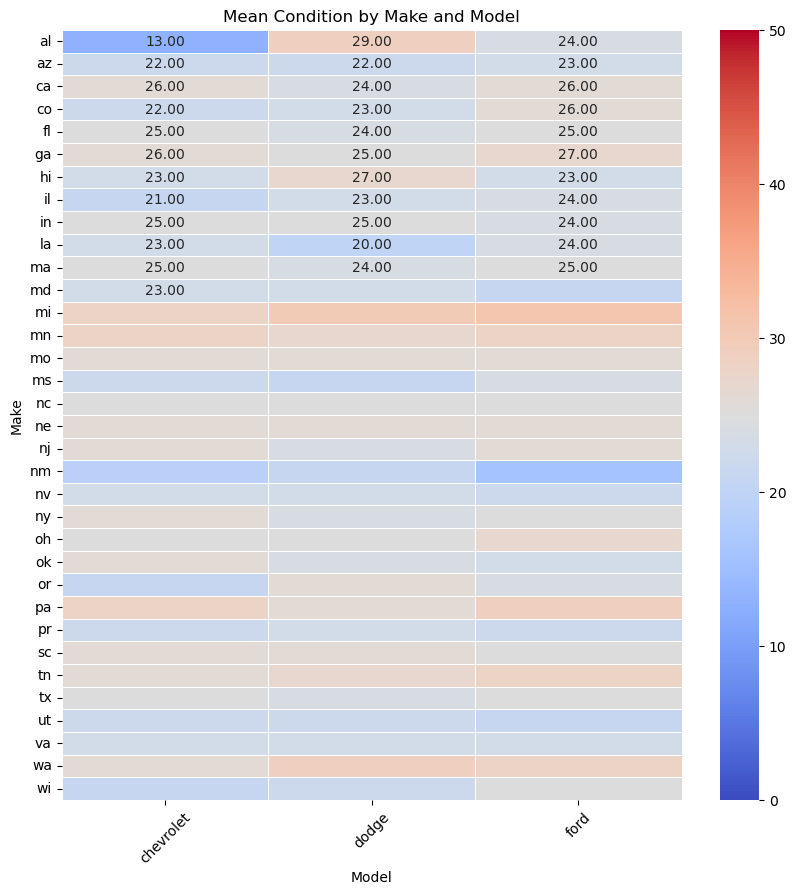

In [302]:
pivot_data = data3.pivot(index='state', columns='make', values='Avg Condition')
plt.figure(figsize=(10, 10))
sns.heatmap(pivot_data, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, vmin= 0 , vmax=50)
plt.title('Mean Condition by Make and Model')
plt.xlabel('Model')
plt.ylabel('Make')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [309]:
import plotly.graph_objects as go

# Pivot the DataFrame to have 'state' as rows, 'make' as columns, and 'Avg Condition' as values
pivot_data = data3.pivot(index='state', columns='make', values='Avg Condition')

# Create a trace for the heatmap
trace = go.Heatmap(z=pivot_data.values,
                   x=pivot_data.columns,
                   y=pivot_data.index,
                   colorscale='RdBu',  # Choose a colorscale
                   colorbar=dict(title='Avg Condition'),
                   zmin=0, zmax=50,  # Set the color scale range
                   hoverongaps=False,
                   text=pivot_data.values,
                   hoverinfo='text')

# Create the layout
layout = go.Layout(title='Mean Condition by Make and State',
                   xaxis=dict(title='Make'),
                   yaxis=dict(title='State'))

# Create the figure and plot the heatmap
fig = go.Figure(data=[trace], layout=layout)
fig.show()


<Axes: xlabel='make', ylabel='Avg Condition'>

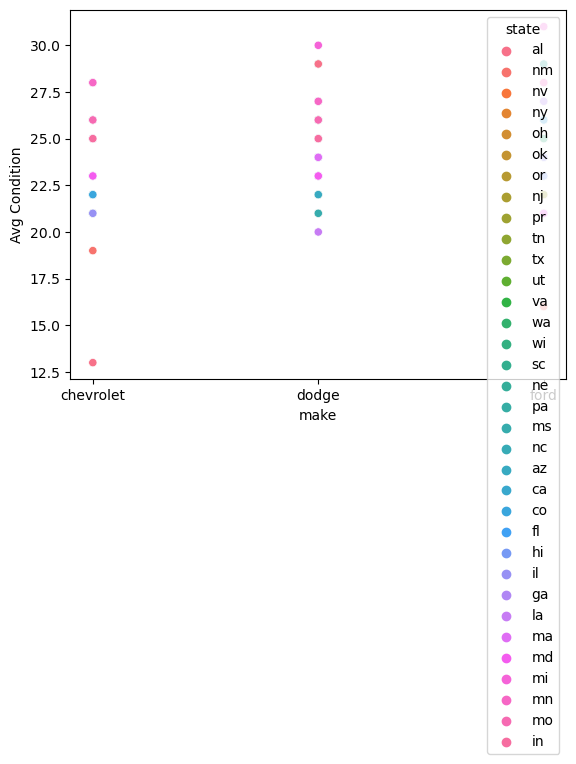

In [314]:
sns.scatterplot(data=data3, x="make", y='Avg Condition', hue="state")

#####  <span style="font-weight: bold;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;💬&nbsp;&nbsp;Findings</span>

- As we can in the diagram, the sales of the vehicles are high in the month of January, Febuary and June.
- It is just below 80k units in the month of January.
- The sales peaks in the month of Febuary by 80k units.
- There is a decline in from march to April.
- The sales rises in stedily in the month of May and June.
- And then there is a decline again.

- So, the company can hire more resources for sales so that they can make the maximun out of the customer buying behevious. And they need to be mindful in the month of April and July as the sales is 0 for these months.

In [211]:
df['saledate'].dt.strftime('%B')
df['saledate'].dt.year

0         2014
1         2014
2         2015
3         2015
4         2014
          ... 
558831    2015
558833    2015
558834    2015
558835    2015
558836    2015
Name: saledate, Length: 472325, dtype: int32

####     ❓ <span style="font-weight: bold;">4️⃣ What propotion of SUV sales have been taken up by each vehicle colors?</span>

#####  <span style="font-weight: bold;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;💎&nbsp;&nbsp;Significance</span>

1. This will show us the color preference of the customers in the market.
2. This is will help the company is finding out what color is in demand.
3. This is also help them in setting the re-sale price according to the demand.

#####  <span style="font-weight: bold;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;📟&nbsp;&nbsp;Code</span>

- I will first create a dataset for my question 4 i.e. `df_q4`. I will filter the data for body.
- Created a new column `propotion` which will have count of sales for each colors.
- I will create another dataset `color_propotion` using `df_q4`, where I will devide the column `propotion` by total units to find a percentage.
- And then we are going to present it in a form of pie chart.

In [360]:
df_q4 = df.loc[(df['body'].str.upper() == 'SUV'),['body','color']].copy()
df_q4
color_propotion = df_q4.groupby(['color']).size().reset_index()
color_propotion
color_propotion['propotion'] = color_propotion[0]
color_propotion
color_propotion.drop(0,axis=1,inplace=True)
total_vehicle_sales = df_q4.groupby(['body','color']).size().sum()
color_propotion['propotion'] = (color_propotion['propotion']/total_vehicle_sales)*100
color_propotion.to_csv('/Users/jasonjoelpinto/Documents/GitHub/python-datascience-projects/009. eda_on_ecommerce_dataset/dataset/output2.csv',index=False)

- Here I will be using plotly to create a pie chart to represent the color propotions.

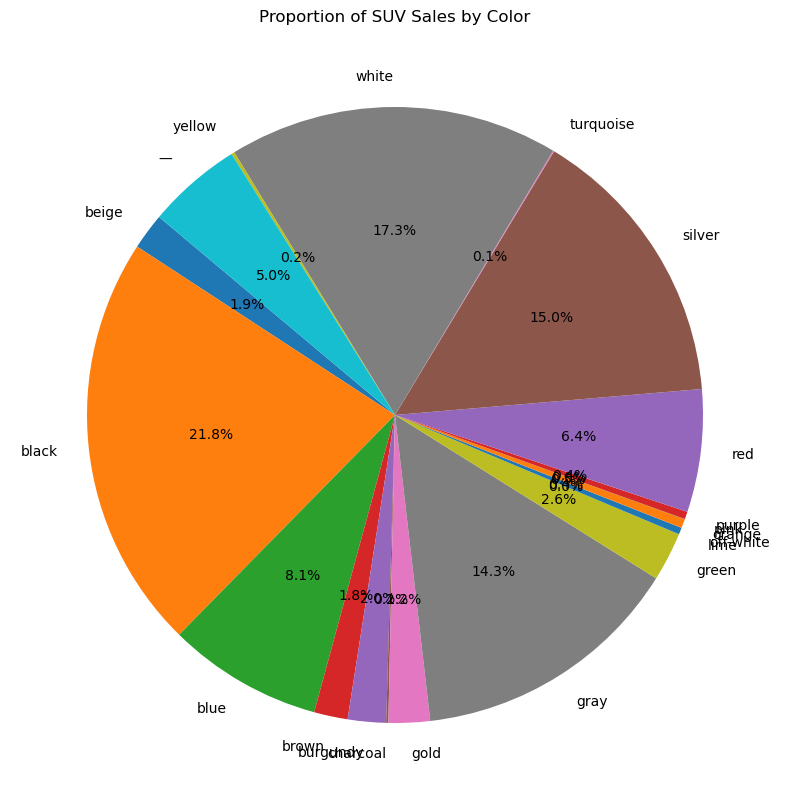

In [359]:
colors = color_propotion['color']
proportion = color_propotion['propotion']
plt.figure(figsize=(10,10))
plt.pie(proportions, labels=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of SUV Sales by Color') 
plt.show()


#####  <span style="font-weight: bold;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;💬&nbsp;&nbsp;Findings</span>

- The sale of color `black` is the most prominent, constituting of 21.8% of the sales.
- Followed by `white` and `silver` which is 17.32% and 15.0% of the sales respectively.
- With this pie chart we come to know the color preferences of the users.
- This will help the company in developing product, sales and inventory management decisions.

####     ❓ <span style="font-weight: bold;">5️⃣ What is the co-relation between odometer reading and the percentage decrease from selling price to MMR of the car?</span>

#####  <span style="font-weight: bold;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;💎&nbsp;&nbsp;Significance</span>

1. This will show us whether odometer reading have any connections for the MMR of the car.
2. This will help the company to set pricing strategies accordingly.

#####  <span style="font-weight: bold;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;📟&nbsp;&nbsp;Code</span>

- I will first create a dataset for my question 4 i.e. `df_q4`. I will filter the data for body.
- I will sample only last 200 entries to simply it for us.
- Created a new column `propotion` which will have count of sales for each colors.
- I will create another dataset `color_propotion` using `df_q4`, where I will devide the column `propotion` by total units to find a percentage.
- And then we are going to present it in a form of pie chart.

In [373]:
df_q5 = df[['odometer','sellingprice','mmr']].sample(n=200, random_state=42)
df_q5['price_decrease_percentage'] = round(((df['sellingprice'] - df['mmr'])/df['sellingprice'])*100)
df_q5

,odometer,sellingprice,mmr,price_decrease_percentage
297590,121222.0,3500.0,4150.0,-19.0
90053,42814.0,19300.0,20400.0,-6.0
341051,20032.0,25000.0,22900.0,8.0
362239,52864.0,10400.0,12050.0,-16.0
480321,72306.0,9400.0,8725.0,7.0
...,...,...,...,...
336779,21095.0,28000.0,28500.0,-2.0
434426,29482.0,25300.0,27700.0,-9.0
345786,38837.0,28101.0,26800.0,5.0
195887,47099.0,7800.0,8075.0,-4.0


- Here I will be using plotly to create a pie chart to represent the color propotions.

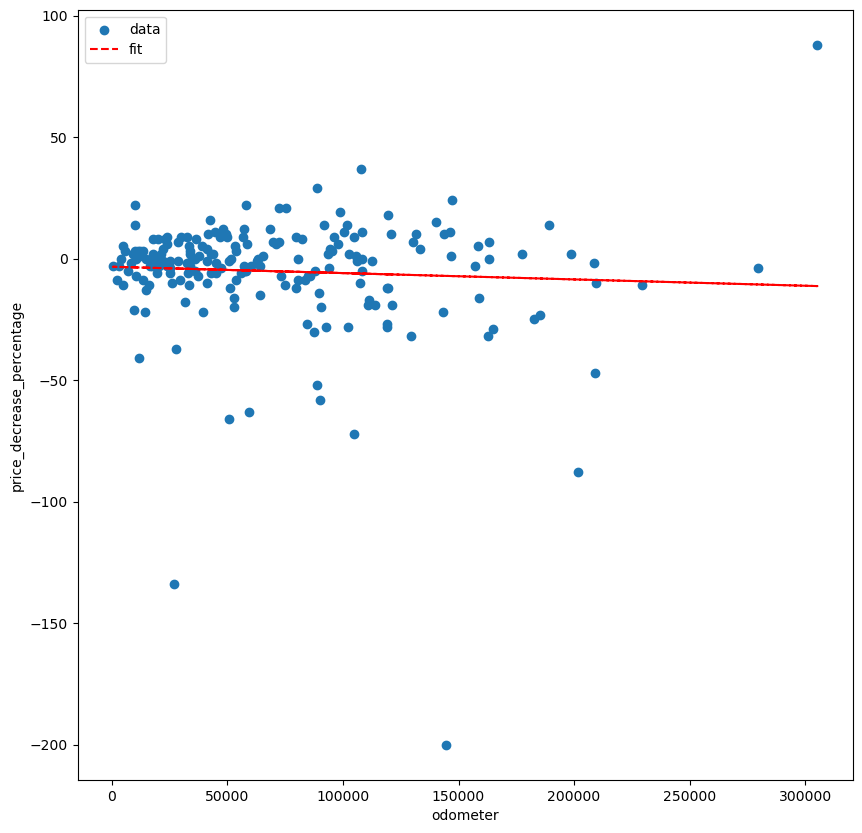

In [379]:
x = df_q5['odometer']
y = df_q5['price_decrease_percentage']

z = np.polyfit(x,y,1)
p = np.poly1d(z)

fig = plt.figure(figsize=(10,10))
ab = fig.add_subplot(1,1,1)
ab.set_xlabel('odometer')
ab.set_ylabel('price_decrease_percentage')

ab.scatter(x, y, label='data')

ab.plot(x, p(x),color='r',linestyle='dashed',label= 'fit' )
ab.legend(loc='upper left')

# # plt.scatter(x,y)
# # plt.show()

sns.scatterplot(data=df_q5, x="odometer", y="price_decrease_percentage", alpha=0.5, s=10)
sns.plot(x,p(x),)
plt.ylim(0, 40)
plt.show()

/Users/jasonjoelpinto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/jasonjoelpinto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



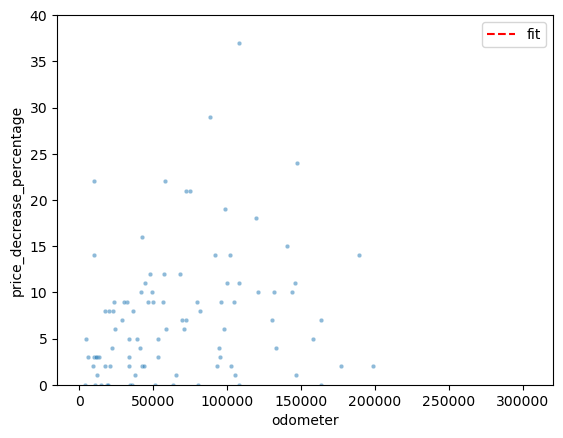

In [380]:
# Fit a linear regression line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Create scatter plot with seaborn
sns.scatterplot(data=df_q5, x="odometer", y="price_decrease_percentage", alpha=0.5, s=10)

# Plot the regression line
sns.lineplot(x=x, y=p(x), color='r', linestyle='dashed', label='fit')

# Set y-axis limits
plt.ylim(0, 40)

# Show plot
plt.show()

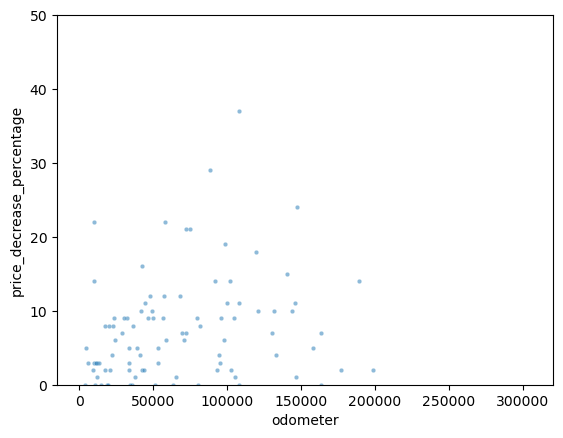

In [376]:
import seaborn as sns

x = df_q5['odometer']
y = df_q5['price_decrease_percentage']

ax = sns.scatterplot(data=df_q5, x="odometer", y="price_decrease_percentage", alpha=0.5, s=10)
ax.set_ylim(0, 50)  # Set y-axis limits
plt.show()
